In [20]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [21]:
df = pd.read_csv('iot_real_dataset2.csv')

In [22]:
df.head()

,DeviceID,Timestamp,DataValue,DeviceType,Location,FirmwareVersion,Label
0,724,1,0.000000,Sensor,Outdoor,9,0
1,724,1,1.056629,Sensor,Outdoor,9,0
2,724,2,16.773011,Sensor,Outdoor,9,0
3,724,2,0.000000,Sensor,Outdoor,9,0
4,724,4,16.138047,Sensor,Outdoor,9,0


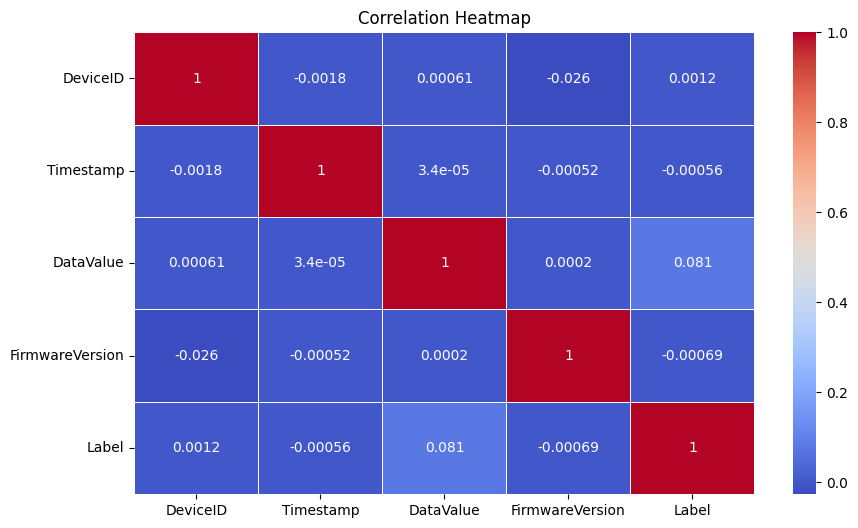

In [23]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


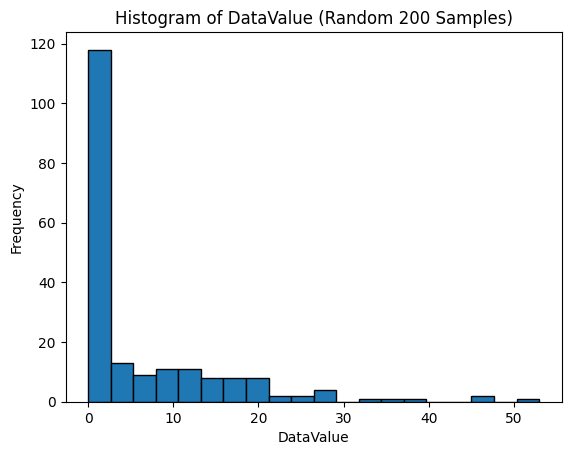

In [24]:
import random

# Randomly select 200 rows from the DataFrame
random_indices = random.sample(range(len(df)), 200)
random_subset = df.iloc[random_indices]

# Create a histogram for the 'DataValue' column of the random subset
plt.hist(random_subset['DataValue'], bins=20, edgecolor='k')
plt.xlabel('DataValue')
plt.ylabel('Frequency')
plt.title('Histogram of DataValue (Random 200 Samples)')
plt.show()

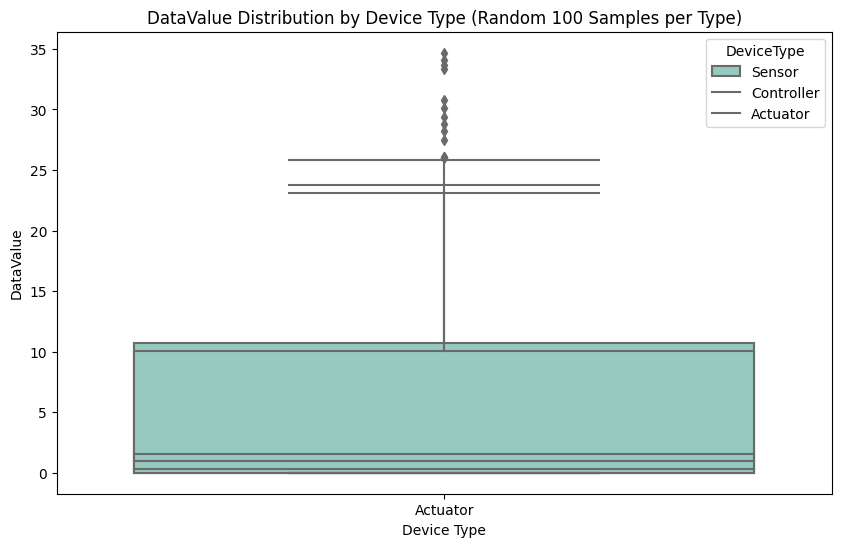

In [25]:
import random

# Get unique device types
device_types = df['DeviceType'].unique()

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Randomly select 100 data points for each device type and create box plots
for device_type in device_types:
    # Filter data for the current device type
    subset = df[df['DeviceType'] == device_type]
    
    # Randomly select 100 rows from the subset
    random_indices = random.sample(range(len(subset)), 100)
    random_subset = subset.iloc[random_indices]
    
    # Create a box plot for the current device type with a label
    sns.boxplot(
        x='DeviceType',
        y='DataValue',
        data=random_subset,
        palette='Set3'
    ).set_title(device_type)  # Add label to the box plot
    
# Customize the plot
plt.title('DataValue Distribution by Device Type (Random 100 Samples per Type)')
plt.xlabel('Device Type')
plt.ylabel('DataValue')

# Create a legend
plt.legend(title='DeviceType', labels=device_types)

plt.show()


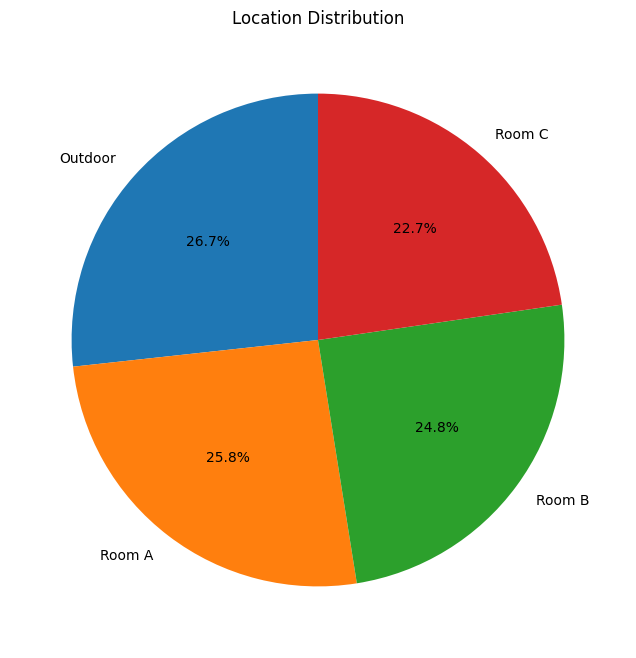

In [26]:
location_counts = df['Location'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Location Distribution')
plt.show()

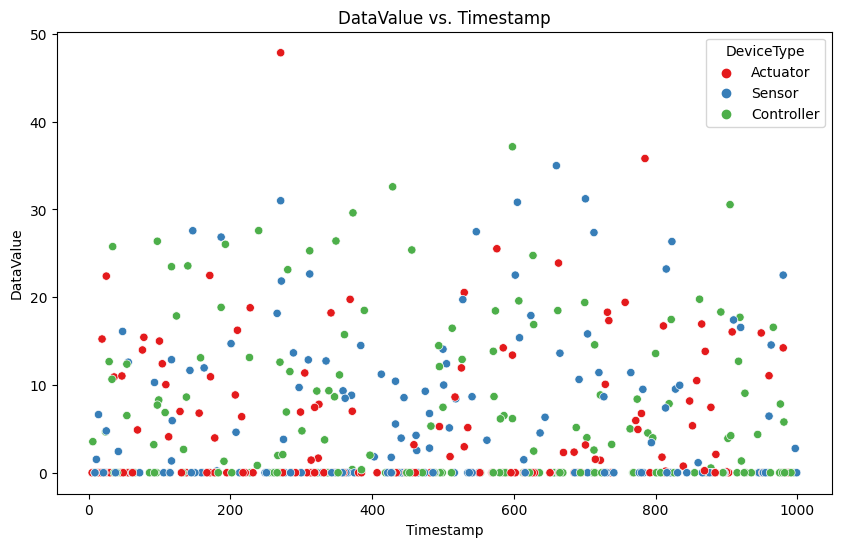

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(500), x='Timestamp', y='DataValue', hue='DeviceType', palette='Set1')
plt.title('DataValue vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('DataValue')
plt.show()

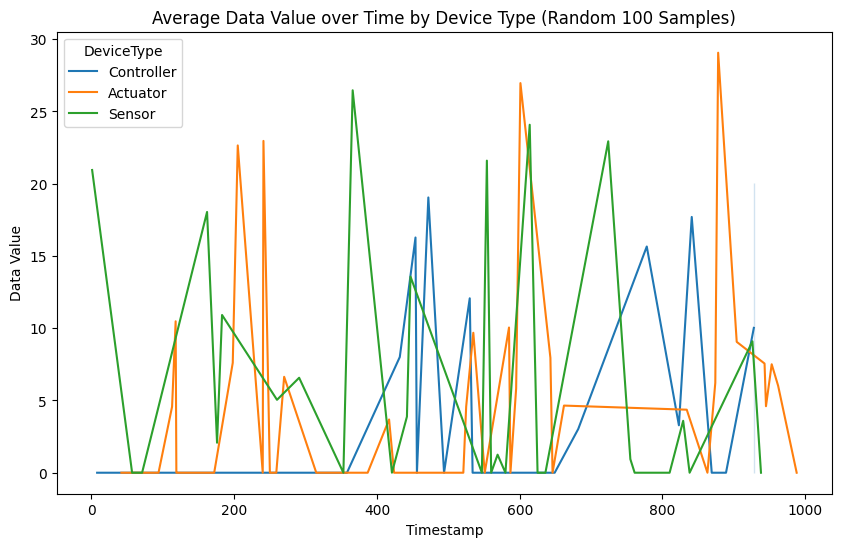

In [28]:
import random

random_indices = random.sample(range(len(df)), 100)
random_subset = df.iloc[random_indices]

# Create the line plot using the random subset
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Timestamp",
    y="DataValue",
    hue="DeviceType",
    data=random_subset
)
plt.xlabel("Timestamp")
plt.ylabel("Data Value")
plt.title("Average Data Value over Time by Device Type (Random 100 Samples)")
plt.legend(title="DeviceType")
plt.show()

In [29]:
df = pd.get_dummies(df, columns=['DeviceType', 'Location'], drop_first=True)


In [30]:
X = df.drop('Label', axis=1)
y = df['Label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
rf_predict = rf_classifier.predict(X_test)


In [34]:
rf_accuracy = accuracy_score(y_test, rf_predict)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 1.00


In [35]:
rf_confusion_matrix = confusion_matrix(y_test, rf_predict)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest Confusion Matrix:
[[299945      0]
 [     0     55]]


Text(0.5, 1.0, 'Confusion Matrix(Random_Forest)')

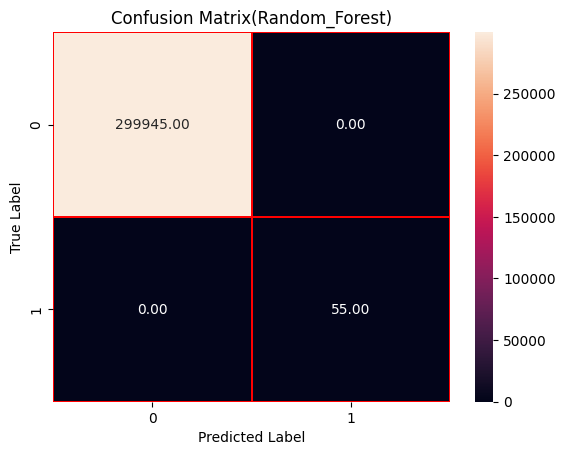

In [36]:
sns.heatmap(rf_confusion_matrix, annot=True, linewidths=0.1, linecolor='red', fmt="0.2f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix(Random_Forest)')

In [37]:
rf_probs = rf_classifier.predict_proba(X_test)[:,-1]
fpr_rf, tpr_rf,_ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

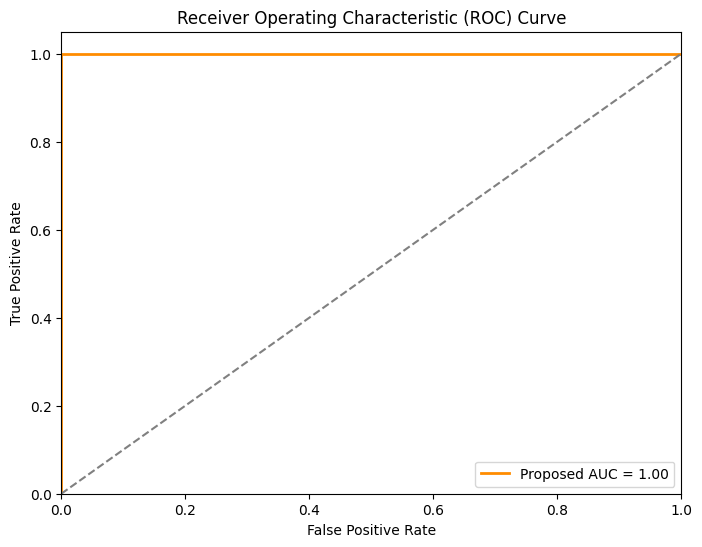

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Proposed AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()